# AC07 - Resolução

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [48]:
notas_alunos = pd.read_csv("https://github.com/danieltb3006/DM_Ibmec/raw/main/notas_alunos_Ibmec.csv", sep=";",encoding="ISO-8859-1")

In [11]:
notas_alunos.head()

,Curso,Alunos,AP1,AP2,Ap3
0,Adm,Joao,4.5,5.0,6.0
1,Dir,Pedro,7.9,9.0,7.0
2,Eco,Ana Maria,2.0,3.0,5.0
3,RI,Paulo,10.0,8.8,9.0
4,Adm,Maria,3.0,7.0,9.0


In [8]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
notas_alunos = pd.read_csv("/content/drive/MyDrive/aulas_ibmec/Pandas/notas_alunos_Ibmec.csv", sep=";",encoding="ISO-8859-1")

* Q01) No arquivo CSV abaixo, verifique se existem "valores nulos" e, caso positivo, preencha com "0" (zero) (ISNULL e FILLNA)

In [13]:
notas_alunos.isnull().sum() # -> Retorna quantos valores nulos tem em cada coluna (Nesse caso, não há valores nulos)

# notas_alunos = notas_alunos.fillna(0) -> Caso tivessem valores nulos

,0
Curso,0
Alunos,0
AP1,0
AP2,0
Ap3,0


* Q02)  crie uma nova coluna que calcule a média da turma, considerando os seguintes pesos para as avaliações:
>* AP1 - 35%
>* AP2 - 25%
>* AP3 - 40%

In [49]:
notas_alunos["Média"] = notas_alunos["AP1"] * 0.35 + notas_alunos["AP2"] * 0.25 + notas_alunos["Ap3"] * 0.4

In [19]:
notas_alunos.head()

,Curso,Alunos,AP1,AP2,Ap3,Média
0,Adm,Joao,4.5,5.0,6.0,5.225
1,Dir,Pedro,7.9,9.0,7.0,7.815
2,Eco,Ana Maria,2.0,3.0,5.0,3.450
3,RI,Paulo,10.0,8.8,9.0,9.300
4,Adm,Maria,3.0,7.0,9.0,6.400


In [23]:
notas_alunos.where(notas_alunos["Alunos"] =="Ana Maria").dropna() # -> Checando especificamente pela aluna Ana Maria (Não faz parte do exercício, apenas explicando o .where)

,Curso,Alunos,AP1,AP2,Ap3,Média
2,Eco,Ana Maria,2.0,3.0,5.0,3.45


* Q03) Insira uma coluna informando a situação final do aluno (aprovado, reprovado ou substitutiva):
>* Aprovado: media >= 6.5
>* Substitutiva: 4 <= media < 6.5
>* Reprovado: media < 4

In [50]:
notas_alunos["Situação_Final"] = ""

In [59]:
for i in range(len(notas_alunos)):
  if notas_alunos.loc[i, "Média"] >= 6.5:
    notas_alunos.loc[i, "Situação_Final"] = "Aprovado"
  elif notas_alunos.loc[i, "Média"] >= 4:
    notas_alunos.loc[i, "Situação_Final"] = "Substitutiva"
  else:
    notas_alunos.loc[i, "Situação_Final"] = "Reprovado"

In [60]:
notas_alunos.head()

,Curso,Alunos,AP1,AP2,Ap3,Média,Situação_Final
0,Administração,Joao,4.5,5.0,6.0,5.225,Substitutiva
1,Direito,Pedro,7.9,9.0,7.0,7.815,Aprovado
2,Economia,Ana Maria,2.0,3.0,5.0,3.450,Reprovado
3,Relações Internacionais,Paulo,10.0,8.8,9.0,9.300,Aprovado
4,Administração,Maria,3.0,7.0,9.0,6.400,Substitutiva


In [35]:
notas_alunos["Situação_Final"].value_counts().dropna()

# notas_alunos.Situação_Final.value_counts().dropna() -> Outra forma de obter o mesmo resultado, geralmente desnecessário e caindo em desuso

,count
Situação_Final,
Substitutiva,20
Aprovado,19
Reprovado,2


* Q04) Escreva por extenso os nomes dos cursos (comando FOR + IF/ELSE + .loc[i,coluna])

In [57]:
for i in range(len(notas_alunos)):
  if notas_alunos.loc[i, "Curso"] == "Adm":
    notas_alunos.loc[i, "Curso"] = "Administração"
  elif notas_alunos.loc[i, "Curso"] == "Eco":
    notas_alunos.loc[i, "Curso"] = "Economia"
  elif notas_alunos.loc[i, "Curso"] == "Dir":
    notas_alunos.loc[i, "Curso"] = "Direito"
  elif notas_alunos.loc[i, "Curso"] == "RI":
    notas_alunos.loc[i, "Curso"] = "Relações Internacionais"

In [38]:
notas_alunos["Curso"].value_counts()

,count
Curso,
Adm,14
Eco,11
RI,10
Dir,6


In [43]:
notas_alunos.loc[0, "Curso"] = notas_alunos.loc[0, "Curso"].replace("Administração", "Adm") # -> Outra forma de substituir valores no dataframe

In [58]:
notas_alunos.head(10)

,Curso,Alunos,AP1,AP2,Ap3,Média,Situação_Final
0,Administração,Joao,4.5,5.0,6.0,5.225,Substitutiva
1,Direito,Pedro,7.9,9.0,7.0,7.815,Aprovado
2,Economia,Ana Maria,2.0,3.0,5.0,3.450,Reprovado
3,Relações Internacionais,Paulo,10.0,8.8,9.0,9.300,Aprovado
4,Administração,Maria,3.0,7.0,9.0,6.400,Substitutiva
5,Administração,Priscila,8.0,6.5,4.0,6.025,Substitutiva
6,Administração,Manoel,5.0,8.0,9.5,7.550,Aprovado
7,Direito,João Paulo,1.0,3.0,5.0,3.100,Reprovado
8,Economia,Ana Paula,4.5,3.0,7.5,5.325,Substitutiva
9,Relações Internacionais,Joana,7.0,8.0,8.0,7.650,Aprovado


* Q05) Monte as fórmulas (groupby) para responder as seguintes perguntas:
>* Média dos alunos por cursos
>* Menor nota AP1 dos alunos por cursos
>* Maior nota AP3 dos alunos por cursos  

In [67]:
notas_alunos.groupby("Curso")["Média"].mean().round(3)

,Média
Curso,
Administração,6.525
Direito,6.661
Economia,6.425
Relações Internacionais,6.760


In [68]:
notas_alunos.groupby("Curso")["AP1"].min()

,AP1
Curso,
Administração,1.0
Direito,1.0
Economia,2.0
Relações Internacionais,2.0


In [70]:
notas_alunos.groupby("Curso")["Ap3"].max()

,Ap3
Curso,
Administração,10.0
Direito,9.8
Economia,10.0
Relações Internacionais,9.5


In [73]:
notas_alunos.where(notas_alunos["Curso"] == "Relações Internacionais").dropna().sort_values(by="AP2", ascending=False)
# Checando especificamente por alunos de RI (Não faz parte do exercício, apenas explicando o .where e .sort_values)

,Curso,Alunos,AP1,AP2,Ap3,Média,Situação_Final
12,Relações Internacionais,Rafael,3.0,9.0,4.0,4.900,Substitutiva
3,Relações Internacionais,Paulo,10.0,8.8,9.0,9.300,Aprovado
9,Relações Internacionais,Joana,7.0,8.0,8.0,7.650,Aprovado
18,Relações Internacionais,Paulo,7.0,8.0,6.0,6.850,Aprovado
19,Relações Internacionais,Celina,2.0,7.0,9.0,6.050,Substitutiva
21,Relações Internacionais,Roberson,4.0,6.0,6.0,5.300,Substitutiva
32,Relações Internacionais,Felipe,10.0,6.0,9.0,8.600,Aprovado
35,Relações Internacionais,Marcos,5.5,5.0,9.5,6.975,Aprovado
27,Relações Internacionais,Luiz Pedro,7.5,4.5,9.5,7.550,Aprovado
28,Relações Internacionais,Joaquim,2.5,3.0,7.0,4.425,Substitutiva


* Q06) Monte um "gráfico de pizza", com legenda e apresentando os valores com duas casas decimais, que mostre a distribuição percentual da Situação dos alunos

In [77]:
df_situacao = notas_alunos["Situação_Final"].value_counts()
df_situacao

,count
Situação_Final,
Substitutiva,20
Aprovado,19
Reprovado,2


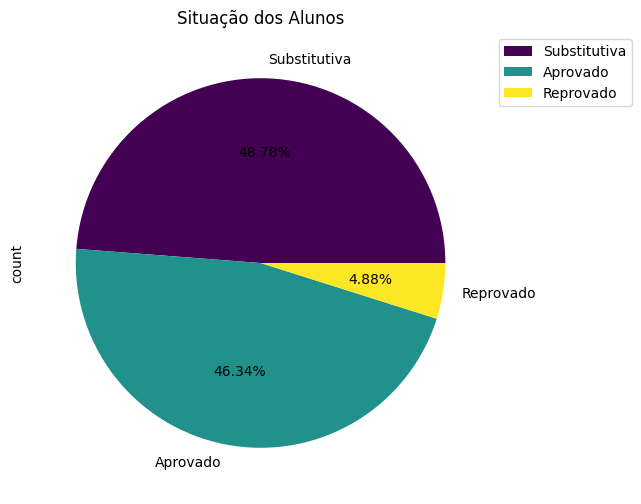

In [84]:
df_situacao.plot.pie(title="Situação dos Alunos", legend=True ,autopct="%.2f%%", figsize=(6, 6), colormap="viridis")
plt.legend(bbox_to_anchor=(1, 1))

* Q07) Monte uma "Tabela Dinâmica" que apresente a média dos alunos, organizada por Situação e por Curso

In [86]:
notas_alunos.pivot_table(values=["Média"], index=["Curso", "Situação_Final"], aggfunc="mean")

Média
Curso                   Situação_Final          
Administração           Aprovado        7.922000
                        Substitutiva    5.749444
Direito                 Aprovado        7.646250
                        Reprovado       3.100000
                        Substitutiva    6.280000
Economia                Aprovado        8.430000
                        Reprovado       3.450000
                        Substitutiva    5.584167
Relações Internacionais Aprovado        7.820833
                        Substitutiva    5.168750

## Salvando o DataFrame para um arquivo xlxs (Excel)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [87]:
notas_alunos.to_excel("/content/drive/MyDrive/aulas_ibmec/Pandas/planilha_vazia.xlsx")

# AC08 - Resolução

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [88]:
lista_cidades = pd.read_csv("/content/drive/MyDrive/aulas_ibmec/Pandas/Lista de 200 cidades.csv")
lista_cidades

,Índice,Município,População em 2022,Variação absoluta,População em 2010,Taxa de crescimento
0,1,São Paulo (SP),11451245,197742,11253503,1.73%
1,2,Rio de Janeiro (RJ),6211423,-109023,6320446,-1.72%
2,3,Brasília (DF),2817068,244909,2572159,9.52%
3,4,Fortaleza (CE),2428678,-31034,2459712,-1.26%
4,5,Salvador (BA),2418005,-257651,2675656,-9.63%
...,...,...,...,...,...,...
195,196,Mogi Guaçu (SP),153661,16416,137245,11.96%
196,197,Pouso Alegre (MG),152212,21597,130615,16.53%
197,198,Araucária (PR),151666,32543,119123,27.32%
198,199,Alagoinhas (BA),151065,9602,141463,6.79%


In [89]:
lista_cidades.info()

# Tipos de Dados (Relembrando):
# int64 -> Número inteiro
# float64 -> Número decimal
# object -> Geralmente texto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Índice               200 non-null    int64 
 1   Município            200 non-null    object
 2   População em 2022    200 non-null    int64 
 3   Variação absoluta    200 non-null    int64 
 4   População em 2010    200 non-null    int64 
 5   Taxa de crescimento  200 non-null    object
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [ ]:
# Preparando o DataFrame para uso
# O método .str.strip() é utilizado para retirar um caracter específico de um texto
# O método .astype() é utilizado para mudar o tipo de variável

lista_cidades["Taxa de crescimento"] = lista_cidades["Taxa de crescimento"].str.strip("%").astype(float)

In [93]:
for i in range(len(lista_cidades)):
  lista_cidades.loc[i, "Taxa de crescimento"] = lista_cidades.loc[i, "Taxa de crescimento"] / 100
lista_cidades

,Índice,Município,População em 2022,Variação absoluta,População em 2010,Taxa de crescimento
0,1,São Paulo (SP),11451245,197742,11253503,0.0173
1,2,Rio de Janeiro (RJ),6211423,-109023,6320446,-0.0172
2,3,Brasília (DF),2817068,244909,2572159,0.0952
3,4,Fortaleza (CE),2428678,-31034,2459712,-0.0126
4,5,Salvador (BA),2418005,-257651,2675656,-0.0963
...,...,...,...,...,...,...
195,196,Mogi Guaçu (SP),153661,16416,137245,0.1196
196,197,Pouso Alegre (MG),152212,21597,130615,0.1653
197,198,Araucária (PR),151666,32543,119123,0.2732
198,199,Alagoinhas (BA),151065,9602,141463,0.0679


In [ ]:
# Agora, vamos separar a coluna "Município" em "Cidade" e "Estado"
# O método .str.split() é utilizado para dividir um texto, separando-o no meio pelo caracter fornecido

lista_cidades["Cidade"] = lista_cidades["Município"].str.split("(", expand=True)[0] # -> Uma lista é criada ao utilizar o split: ["São Paulo ", "SP)"] -> Especificar em colchetes o valor desejado
lista_cidades["Estado"] = lista_cidades["Município"].str.split("(", expand=True)[1].str.strip(")")
lista_cidades

In [96]:
lista_cidades.columns

Index(['Índice', 'Município', 'População em 2022', 'Variação absoluta',
       'População em 2010', 'Taxa de crescimento', 'Cidade', 'Estado'],
      dtype='object')

In [97]:
# Filtrando o dataframe para torná-lo melhor otimizado utilizando o método .filter() e inserindo os itens na ordem desejada

lista_cidades2 = lista_cidades.filter(items=["Estado", "Cidade", "População em 2010", "População em 2022", "Variação absoluta", "Taxa de crescimento"])
lista_cidades2

,Estado,Cidade,População em 2010,População em 2022,Variação absoluta,Taxa de crescimento
0,SP,São Paulo,11253503,11451245,197742,0.0173
1,RJ,Rio de Janeiro,6320446,6211423,-109023,-0.0172
2,DF,Brasília,2572159,2817068,244909,0.0952
3,CE,Fortaleza,2459712,2428678,-31034,-0.0126
4,BA,Salvador,2675656,2418005,-257651,-0.0963
...,...,...,...,...,...,...
195,SP,Mogi Guaçu,137245,153661,16416,0.1196
196,MG,Pouso Alegre,130615,152212,21597,0.1653
197,PR,Araucária,119123,151666,32543,0.2732
198,BA,Alagoinhas,141463,151065,9602,0.0679


* Q01)  Encontre qual a cidade:
>* de SC que teve a maior Taxa de Crescimento
>* do PA que teve a menor População em 2022
>* quantas cidades (e quais) do RS tiveram a População em 2022, abaixo da média da População em 2022 do PI

In [101]:
maior_valor_crescimento_sc = lista_cidades2.where(lista_cidades2["Estado"] == "SC")["Taxa de crescimento"].max()
q1_1 = lista_cidades2["Cidade"].loc[lista_cidades2["Taxa de crescimento"] == maior_valor_crescimento_sc]
q1_1

,Cidade
140,Palhoça


In [99]:
q1_2 = lista_cidades2["Cidade"].loc[lista_cidades2["População em 2022"] == lista_cidades2.where(lista_cidades2["Estado"] == "PA")["População em 2022"].min()]
q1_2

,Cidade
189,Abaetetuba


In [107]:
q1_3 = lista_cidades2["Cidade"].loc[lista_cidades2.where(lista_cidades2["Estado"] == "RS")["População em 2022"] < lista_cidades2.where(lista_cidades2["Estado"] == "PI")["População em 2022"].mean()].dropna()
q1_3

,Cidade
106,Gravataí
143,São Leopoldo
157,Rio Grande


* Q02) Encontre qual a População em 2010:
>* dessa cidade de SC
>* dessa cidade do PA
>* dessas cidades do MS

In [105]:
q2_1 = lista_cidades2["População em 2010"].loc[lista_cidades2["Taxa de crescimento"] == lista_cidades2.where(lista_cidades2["Estado"] == "SC")["Taxa de crescimento"].max()]
q2_1

,População em 2010
140,137334


In [108]:
q2_2 = lista_cidades2["População em 2010"].loc[lista_cidades2["População em 2022"] == lista_cidades2.where(lista_cidades2["Estado"] == "PA")["População em 2022"].min()]
q2_2

,População em 2010
189,1411


In [110]:
q2_3 = lista_cidades2["População em 2010"].loc[lista_cidades2.where(lista_cidades2["Estado"] == "MS")["População em 2022"] < lista_cidades2.where(lista_cidades2["Estado"] == "PI")["População em 2022"].mean()].dropna()
q2_3 # -> Nenhuma cidade do Mato Grosso do Sul em 2022 teve sua população menor do que a média da população em 2022 das cidaeds do Piauí, logo, não há resposta

,População em 2010


In [114]:
# Imprimindo os valores das respostas no terminal através da função print()

print("Questão 1 letra a: ")
print(q1_1)
print("")
print("Questão 1 letra b: ")
print(q1_2)
print("")
print("Questão 1 letra c: ")
print(q1_3)
print("")
print("Questão 2 letra a: ")
print(q2_1)
print("")
print("Questão 2 letra b: ")
print(q2_2)
print("")
print("Questão 2 letra c: ")
print(q2_3)

Questão 1 letra a: 
140    Palhoça 
Name: Cidade, dtype: object

Questão 1 letra b: 
189    Abaetetuba 
Name: Cidade, dtype: object

Questão 1 letra c: 
106        Gravataí 
143    São Leopoldo 
157      Rio Grande 
Name: Cidade, dtype: object

Questão 2 letra a: 
140    137334
Name: População em 2010, dtype: int64

Questão 2 letra b: 
189    1411
Name: População em 2010, dtype: int64

Questão 2 letra c: 
Series([], Name: População em 2010, dtype: int64)
